Additional Python OpenCV tutorials can be found here: https://docs.opencv.org/3.4/d6/d00/tutorial_py_root.html

In [ ]:
#Code to skip running cell
%%script echo skipping

#Remove old stereo-image directory
import shutil
shutil.rmtree('stereo-image')

skipping


**Global Packages**

In [ ]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2 as cv
from matplotlib import patches

**Import Stereo Images**
---




In [ ]:
#%%script echo skipping

!git clone https://github.com/faruklinux/stereo-image.git

Cloning into 'stereo-image'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 136 (delta 6), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (136/136), 128.63 MiB | 19.13 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Checking out files: 100% (124/124), done.


Setup Folder directories in Google Collab
---



In [ ]:
stereo_dir = '/content/stereo-image/'

In [ ]:
left_image_dir = os.path.join(stereo_dir, 'image_L')

In [ ]:
right_image_dir = os.path.join(stereo_dir, 'image_R')

In [ ]:
left_image_names = os.listdir(left_image_dir)
left_image_names.sort()

right_image_names = os.listdir(right_image_dir)
right_image_names.sort()


Check plot of Stereo Images
---



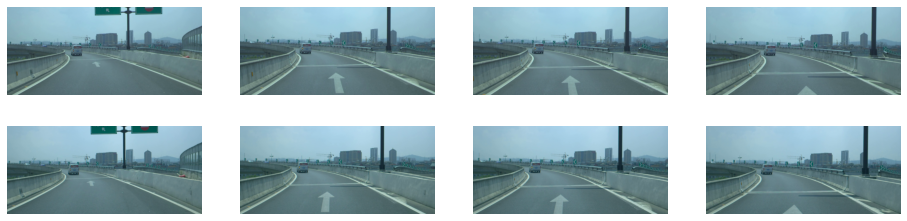

In [ ]:
# Parameters for our graph; we'll output images in a 2x4 configuration
nrows = 2
ncols = 4

# Set up matplotlib fig, and size it to fit the image array
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*2)

left_picture = [os.path.join(left_image_dir, fname) 
                for fname in left_image_names[0:4]]
right_picture = [os.path.join(right_image_dir, fname) 
                for fname in right_image_names[0:4]]

for i, img_path in enumerate(left_picture+right_picture):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

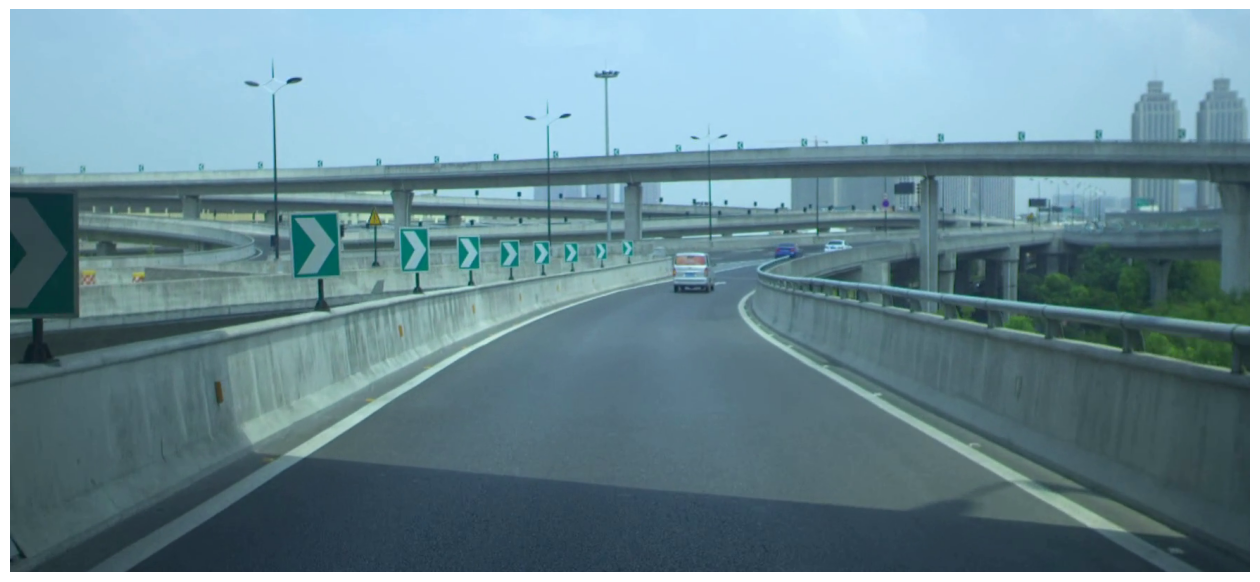

In [ ]:
SampleImageL = os.path.join(left_image_dir, left_image_names[30])
img = mpimg.imread(SampleImageL)
plt.figure(figsize=(16, 12), dpi=100)
plt.imshow(img)
plt.axis('off')
plt.show()

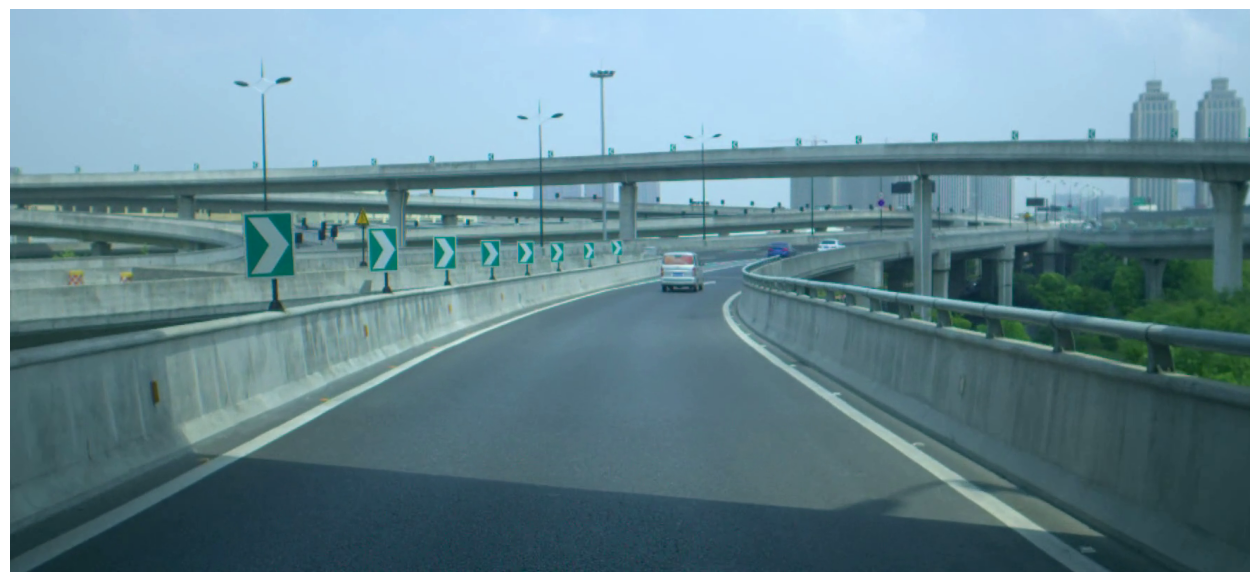

In [ ]:
SampleImageR = os.path.join(right_image_dir, right_image_names[30])
img = mpimg.imread(SampleImageR)
plt.figure(figsize=(16, 12), dpi=100)
plt.imshow(img)
plt.axis('off')
plt.show()

**Image Disparity**
---


In [ ]:
%%script echo skipping

SampleImageL = os.path.join(left_image_dir, left_image_names[1])
SampleImageR = os.path.join(right_image_dir, right_image_names[1])

imgL = cv.imread(SampleImageL, cv.IMREAD_GRAYSCALE)
imgR = cv.imread(SampleImageR, cv.IMREAD_GRAYSCALE)

# ^ Can also output one channel image with cv.imread("img",0)

# print(imgL.shape)
#plt.imshow(imgL,'gray') #imshow cmap
#plt.axis('off')
#plt.show()



skipping


In [ ]:
def compute_disparity_map(img_left, img_right):
    #Run function if making changes to initialise

    imgL = cv.imread(SampleImageL, cv.IMREAD_GRAYSCALE)
    imgR = cv.imread(SampleImageR, cv.IMREAD_GRAYSCALE)

    # Parameters
    num_disparities = 6*16
    block_size = 11

    min_disparity = 0
    window_size = 6
        
    # Stereo SGBM matcher
    stereo = cv.StereoSGBM_create(
        minDisparity=min_disparity,
        numDisparities=num_disparities,
        blockSize=block_size,
        P1=8 * 3 * window_size ** 2,
        P2=32 * 3 * window_size ** 2,
        mode=cv.STEREO_SGBM_MODE_HH4
    )
    # Compute the left disparity map
    disparity = stereo.compute(imgL,imgR).astype(np.float32)/16.0
    
    return disparity

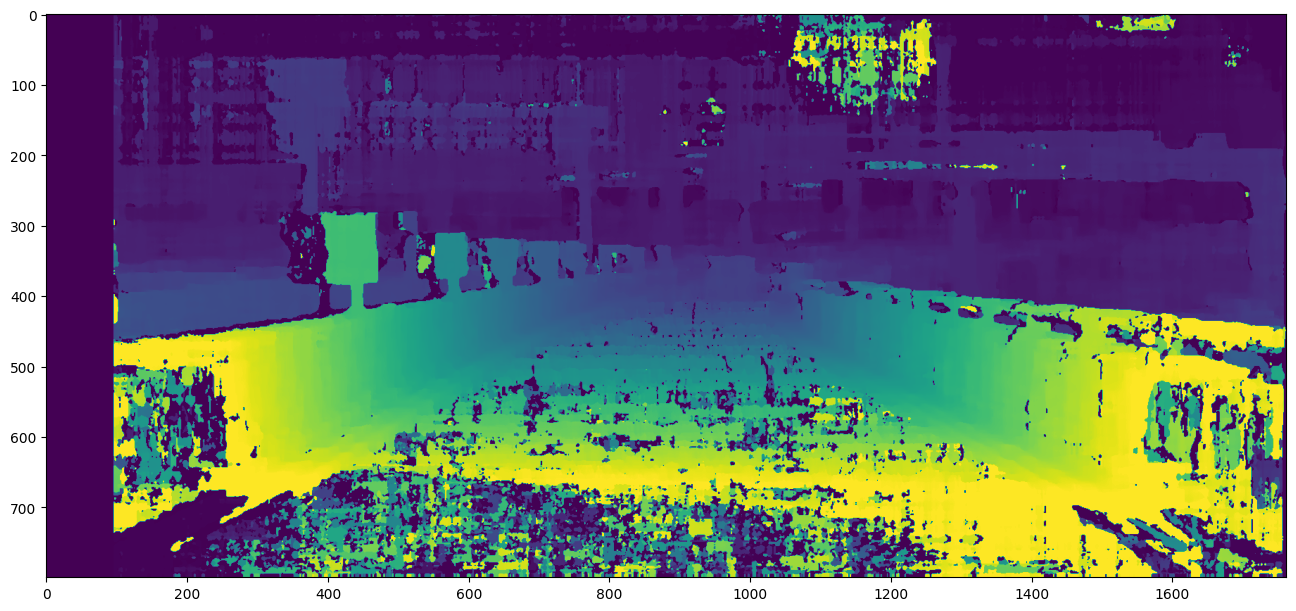

In [ ]:
#Image Number (from 0 to 59)

i=1

imgL = os.path.join(left_image_dir, left_image_names[i])
imgR = os.path.join(right_image_dir, right_image_names[i])

disparity = compute_disparity_map(imgL, imgR)

plt.figure(figsize=(16, 12), dpi=100)
plt.imshow(disparity)
plt.show()

In [ ]:
def compute_disparity_map_alternate(img_left, img_right):
    
    #Try various parameters in SBGM matcher to evaluate the output for both the Disparity Map and the Depth Map in later section
    #information regarding parameters can be found here: https://docs.opencv.org/3.4/d2/d85/classcv_1_1StereoSGBM.html

    imgL = cv.imread(SampleImageL, cv.IMREAD_GRAYSCALE)
    imgR = cv.imread(SampleImageR, cv.IMREAD_GRAYSCALE)

    b = 1
    stereo = cv.StereoSGBM_create(numDisparities=128,
                                  blockSize=b, 
                                  P1=8*3*b*b,
                                  P2=32*3*b*b,
                                  uniquenessRatio=20,
                                  speckleWindowSize=200,
                                  speckleRange=2,
                                  mode=True
                                  )
        
    # Compute the left disparity map
    disparity = stereo.compute(imgL,imgR).astype(np.float32)/16.0
    
    return disparity

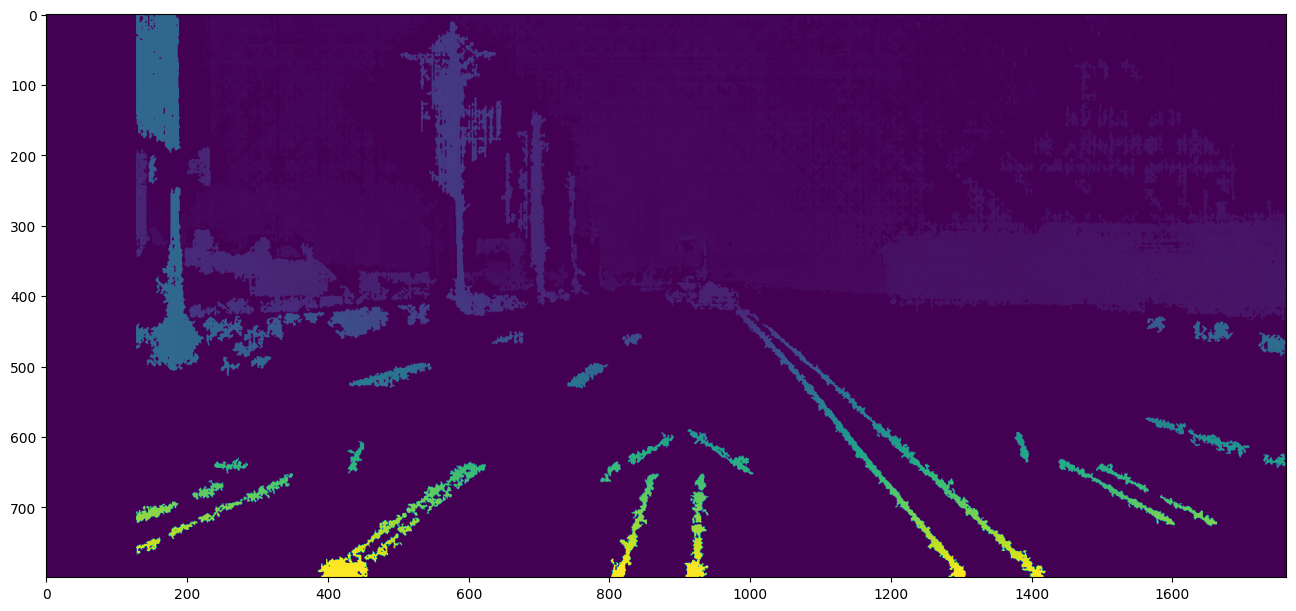

In [ ]:
#Image Number (from 0 to 59)
i=59

SampleImageL = os.path.join(left_image_dir, left_image_names[i])
SampleImageR = os.path.join(right_image_dir, right_image_names[i])

disparity = compute_disparity_map_alternate(imgL, imgR)

plt.figure(figsize=(16, 12), dpi=100)
plt.imshow(disparity)
#plt.imshow(disparity, 'gray')
plt.show()

Check the appropriatness of the parameters in cv.StereoSGBM across the whole dataset



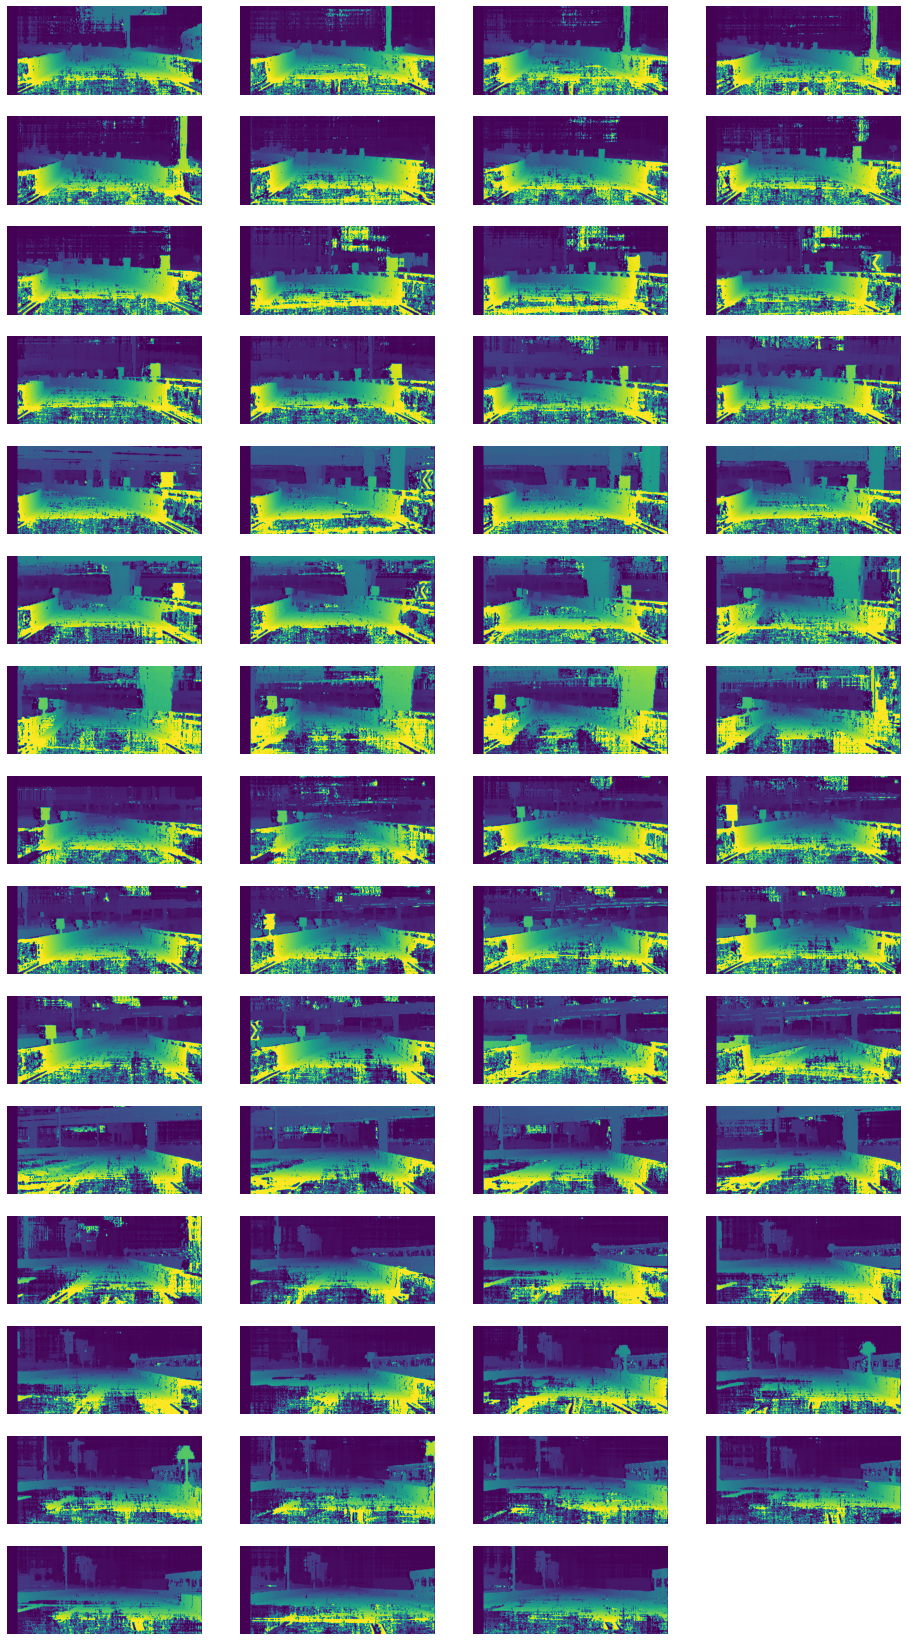

In [ ]:
#%%script echo skipping

# Parameters for our graph; we'll output images in a 2x4 configuration
nrows = 15
ncols = 4

# Set up matplotlib fig, and size it to fit the image array
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*2)

for i in range(59):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  #We have 60 stereo matched images in array [0:59] 
  SampleImageL = os.path.join(left_image_dir, left_image_names[i])
  SampleImageR = os.path.join(right_image_dir, right_image_names[i])

  disparity = compute_disparity_map(imgL,imgR)
  #disparity = compute_disparity_map_alternate(imgL, imgR)

  plt.imshow(disparity)
  #plt.imshow(disparity, 'gray')


plt.show()

**Depth Map**
---


Decompose projection matrices P [3x4] which contains both extrinsic and intrinsic camera parameters

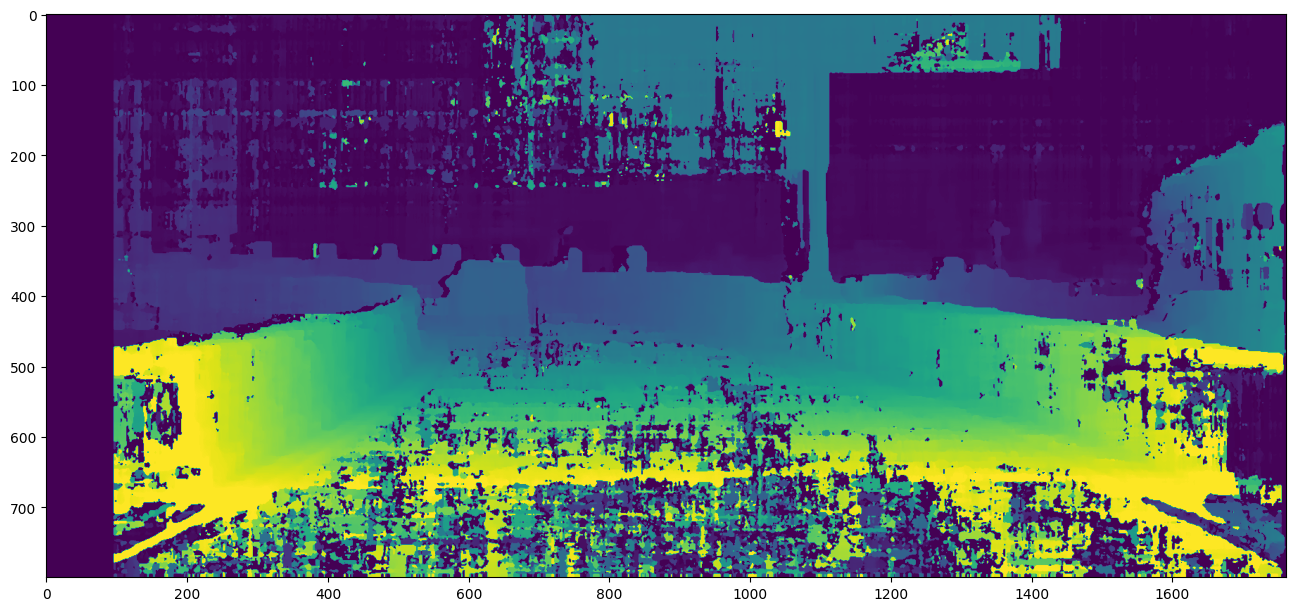

In [ ]:
#Image Number (from 0 to 59)

i=0

SampleImageL = os.path.join(left_image_dir, left_image_names[i])
SampleImageR = os.path.join(right_image_dir, right_image_names[i])

disparity = compute_disparity_map(SampleImageL, SampleImageR)
#disparity = compute_disparity_map_alternate(SampleImageL, SampleImageR)

plt.figure(figsize=(16, 12), dpi=100)
plt.imshow(disparity)

plt.show()

In [ ]:
p_left = np.array([[2013.876, 0.0, 906.0471, -1097.446], 
                    [0.0, 2013.876, 397.578, 0.0], 
                    [0.0, 0.0, 1.0, 0.0]])

p_right = np.array([[2013.876, 0.0, 906.0471, 0.0], 
                    [0.0, 2013.876, 397.578, 0.0], 
                    [0.0, 0.0, 1.0, 0.0]])

In [ ]:
def decompose_projection_matrix(p):
    
    k, r, t, _, _, _, _ = cv.decomposeProjectionMatrix(p)
    t = t / t[3]

    return k, r, t

In [ ]:
# Decompose each matrix
k_left, r_left, t_left = decompose_projection_matrix(p_left)
k_right, r_right, t_right = decompose_projection_matrix(p_right)

# Use regular numpy notation instead of scientific one 
np.set_printoptions(suppress=True)

# Display the matrices
print("k_left \n", k_left)
print("\nr_left \n", r_left)
print("\nt_left \n", t_left)
print("\nk_right \n", k_right)
print("\nr_right \n", r_right)
print("\nt_right \n", t_right)

k_left 
 [[2013.876     0.      906.0471]
 [   0.     2013.876   397.578 ]
 [   0.        0.        1.    ]]

r_left 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

t_left 
 [[0.54494219]
 [0.        ]
 [0.        ]
 [1.        ]]

k_right 
 [[2013.876     0.      906.0471]
 [   0.     2013.876   397.578 ]
 [   0.        0.        1.    ]]

r_right 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

t_right 
 [[0.]
 [0.]
 [0.]
 [1.]]


Generate depth map

In [ ]:
def calc_depth_map(disparity, k_left, t_left, t_right):
    
    # Get the focal length from the K matrix
    f = k_left[0, 0]

    # Get the distance between the cameras from the t matrices (baseline)
    b = t_left[1] - t_right[1]

    # Replace all instances of 0 and -1 disparity with a small minimum value (to avoid div by 0 or negatives)
    disparity[disparity == 0] = 0.1
    disparity[disparity == -1] = 0.1

    # Initialize the depth map to match the size of the disparity map
    depth_map = np.ones(disparity.shape, np.single)

    # Calculate the depths 
    depth_map[:] = f * b / disparity[:]
      
    return depth_map

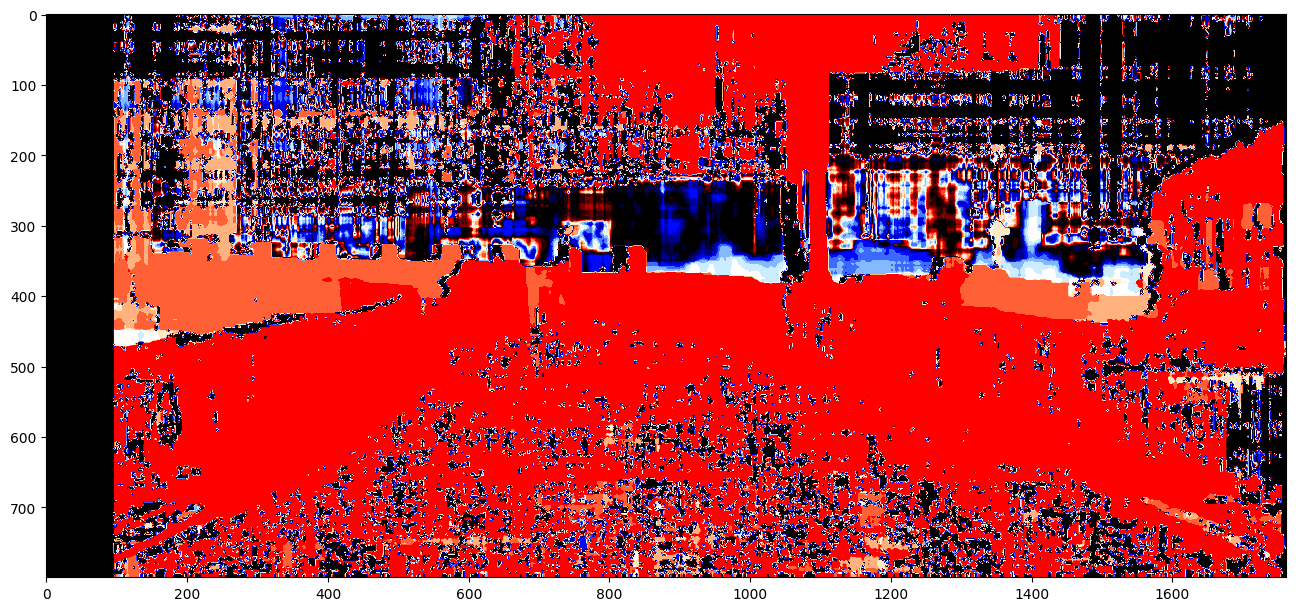

In [ ]:
# Get the depth map by calling the above function
depth_map = calc_depth_map(disparity, k_left, t_left, t_right)

# Display the depth map
plt.figure(figsize=(16, 12), dpi=100)
plt.imshow(depth_map, 'flag')
plt.show()

 **Distance to vehicle**
---



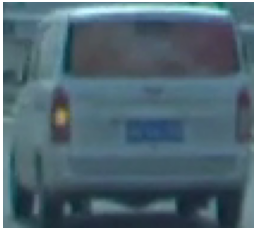

In [ ]:
croppedImage = "/content/stereo-image/2018-08-01-11-13-14_2018-08-01-11-15-15-137[cropped].png"
img = mpimg.imread(croppedImage)
plt.figure(figsize=(16, 12), dpi=25)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
def locate_obstacle_in_image(image_scene, obstacle):

    image_scene = cv.imread(image_scene)
    obstacle = cv.imread(obstacle)

    # Run the template matching from OpenCV
    cross_corr_map = cv.matchTemplate(image_scene, obstacle, cv.TM_CCOEFF)
    
    # Locate the position of the obstacle using the minMaxLoc function from OpenCV
    _, _, _, obstacle_location = cv.minMaxLoc(cross_corr_map)

    return cross_corr_map, obstacle_location

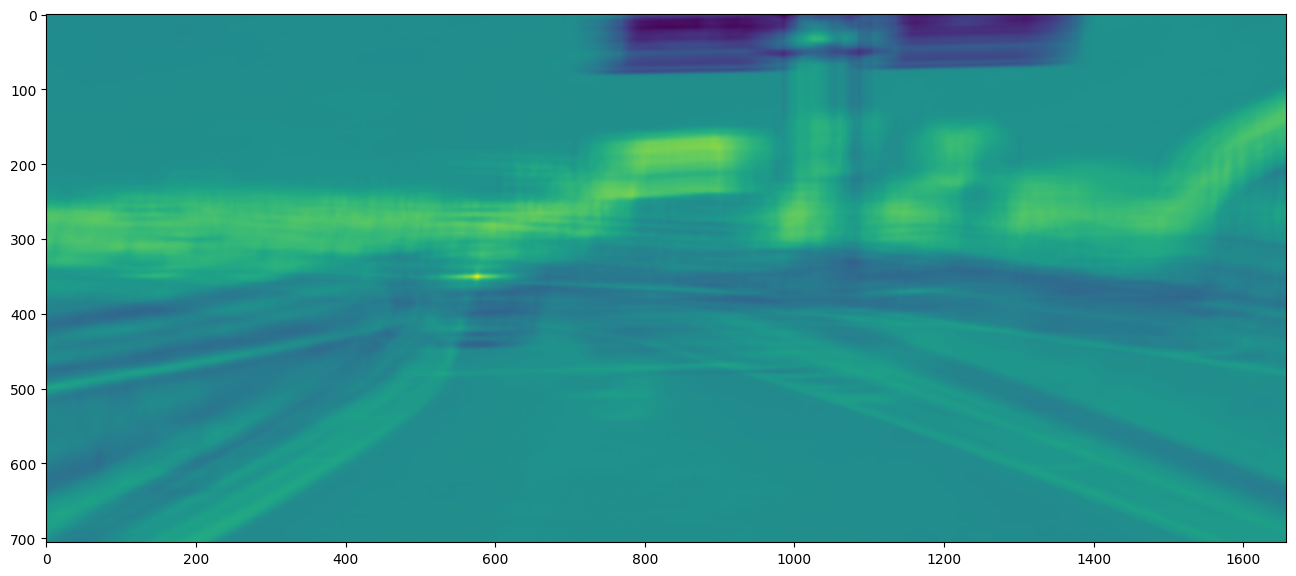

obstacle_location 
 (576, 351)


In [ ]:
i=0
SampleImageL = os.path.join(left_image_dir, left_image_names[i])

# Gather the cross correlation map and the obstacle location in the image
cross_corr_map, obstacle_location = locate_obstacle_in_image(SampleImageL, croppedImage)

# Display the cross correlation heatmap 
plt.figure(figsize=(16, 12), dpi=100)
plt.imshow(cross_corr_map)
plt.show()

# Print the obstacle location
print("obstacle_location \n", obstacle_location)

Bounding box around vehicle

In [ ]:
def calculate_nearest_point(depth_map, obstacle_location, obstacle_img):
    
    obstacle_img = cv.imread(obstacle_img)

    # Gather the relative parameters of the obstacle box
    obstacle_width = obstacle_img.shape[0]
    obstacle_height = obstacle_img.shape[1]
    obstacle_min_x_pos = obstacle_location[1]
    obstacle_max_x_pos = obstacle_location[1] + obstacle_width
    obstacle_min_y_pos = obstacle_location[0]
    obstacle_max_y_pos = obstacle_location[0] + obstacle_height

    # Get the depth of the pixels within the bounds of the obstacle image, find the closest point in this rectangle
    
    obstacle_depth = depth_map[obstacle_min_x_pos:obstacle_max_x_pos, obstacle_min_y_pos:obstacle_max_y_pos]
    obstacle_distance = obstacle_depth.max()*1e14 #should use .min() but getting small values, 
                                                  #multiplied by 1e14 to obtain a reasonable distance to the object
    
    # Create the obstacle bounding box 
    obstacle_bbox = patches.Rectangle((obstacle_min_y_pos, obstacle_min_x_pos), obstacle_height, obstacle_width, 
                                 linewidth=1, edgecolor='r', facecolor='none')
    
    return obstacle_distance, obstacle_bbox

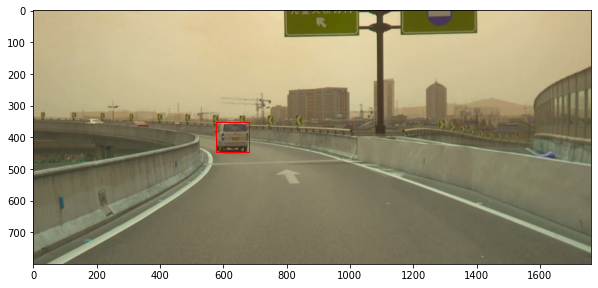

closest_point_depth 16.29


In [ ]:
# Use the developed nearest point function to get the closest point depth and obstacle bounding box
closest_point_depth, obstacle_bbox = calculate_nearest_point(depth_map, obstacle_location, croppedImage)

image_scene = cv.imread(SampleImageL,3)

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image_scene)
ax.add_patch(obstacle_bbox)
plt.show()

# Print the depth of the nearest point
print("closest_point_depth {0:0.2f}".format(closest_point_depth))

#obstacle_depth = depth_map[575:625,375:425]
#obstacle_distance = obstacle_depth.max()*1e16
#print(obstacle_distance)

**Challenge: Create a function that finds the distance to the target vehicle across all 60 images in the dataset**

Compare to neural network depth approach?

https://github.com/nianticlabs/monodepth2/blob/master/depth_prediction_example.ipynb



 **Visual Odometry**
---
We will aim to estimate the motion of our vehicle across the 60 images in our dataset